## ----------------------------- All about Neural Networks ------------------------------------##


In [9]:
import numpy as np 
import pandas as pd
import h5py
import scipy
from PIL import Image 
from scipy import ndimage 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("C:/Users/cool/Documents/NN.csv")

In [11]:
data = df.copy()

In [12]:
df.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [13]:
df = df.loc[0:99,['Sepal.Length','Petal.Length']]

In [14]:
df['flag'] = [ 1 if i <= 49 else 0 for i in range(100)]

## Scatter plot  of data  

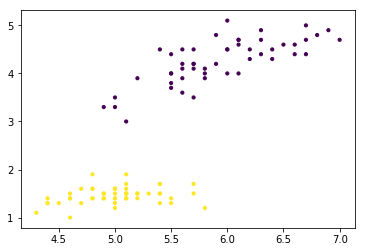

In [15]:
plt.scatter(df['Sepal.Length'], df['Petal.Length'], c= df['flag'],s = 10)

In [16]:

print(w)
print(b)

NameError: name 'w' is not defined

In [17]:
#df['flag']

In [57]:

### randomization of parameters 
w = np.random.rand(1,2)
b = np.random.rand(1)
m = df.shape[0]
learning_rate = 0.2
cos = []
ind = []

for i in range(1000):
   

    ##  Foroward and backwordpropogation 
    Z = np.matmul(w,df.drop('flag',axis=1).transpose()) + b
    A  = 1 /(1+ np.exp(-Z))                                   # sigmpoid activation function or


    ## Cost function
    c1 = np.matmul(df['flag'].transpose(),np.log(A).transpose())
    c2 = np.matmul((1-df['flag'].transpose()),np.log(1-A.transpose()))
    cost = np.matrix((-1/m)*(c1 + c2))                                   # final cost function 

    ## Backpropogationd
    dw = (1/m)*np.matmul(df.drop('flag',axis = 1).transpose(),(A.transpose()-np.matrix(df['flag']).transpose()))
    db = (1/m)*np.sum(A.transpose() - np.matrix(df['flag']).transpose())

    ## Gradine decent algorithem 
    w = w - learning_rate * dw.transpose()

    b = b - learning_rate * np.array(db)
    if i%20 == 0:
        cos.append(cost[0,0])
        print(cost)
        ind.append(i)

[[ 1.63930164]]
[[ 0.26171572]]
[[ 0.14476061]]
[[ 0.10008383]]
[[ 0.07679696]]
[[ 0.06253048]]
[[ 0.05288904]]
[[ 0.04593047]]
[[ 0.04066623]]
[[ 0.03654064]]
[[ 0.03321739]]
[[ 0.030481]]
[[ 0.02818703]]
[[ 0.02623499]]
[[ 0.0245528]]
[[ 0.02308739]]
[[ 0.0217988]]
[[ 0.02065639]]
[[ 0.01963625]]
[[ 0.01871942]]
[[ 0.01789072]]
[[ 0.0171378]]
[[ 0.01645055]]
[[ 0.01582057]]
[[ 0.01524087]]
[[ 0.01470555]]
[[ 0.01420959]]
[[ 0.01374873]]
[[ 0.01331929]]
[[ 0.01291811]]
[[ 0.01254242]]
[[ 0.01218981]]
[[ 0.01185819]]
[[ 0.01154569]]
[[ 0.01125067]]
[[ 0.01097167]]
[[ 0.01070738]]
[[ 0.01045666]]
[[ 0.01021846]]
[[ 0.00999183]]
[[ 0.00977595]]
[[ 0.00957004]]
[[ 0.00937341]]
[[ 0.00918544]]
[[ 0.00900555]]
[[ 0.00883322]]
[[ 0.00866797]]
[[ 0.00850936]]
[[ 0.00835699]]
[[ 0.00821049]]


In [60]:
print(cos)
print(ind)

[1.6393016366796929, 0.26171572260475251, 0.144760607859691, 0.10008383090996276, 0.076796955287007251, 0.062530482043896746, 0.052889042013902987, 0.045930466105867755, 0.04066623444655422, 0.036540644590996284, 0.03321738850169477, 0.030481000684549411, 0.028187031584419559, 0.026234993906247218, 0.024552802191350108, 0.023087386711076647, 0.021798800736496184, 0.020656392715057224, 0.019636245557824405, 0.018719419094671941, 0.017890716262799092, 0.017137799462402327, 0.016450546296427747, 0.015820572248170052, 0.015240871878970195, 0.014705545546040526, 0.01420958874506436, 0.01374872793332743, 0.013319291279581851, 0.012918105958731677, 0.012542415833778756, 0.012189814948765056, 0.011858193394883705, 0.011545692941200718, 0.011250670432119785, 0.010971667408053777, 0.010707384747003716, 0.010456661383343158, 0.0102184563577262, 0.009991833604255887, 0.0097759489991736323, 0.0095700392876439215, 0.0093734125778302119, 0.0091854401489534464, 0.0090055493658130446, 0.008833217528926

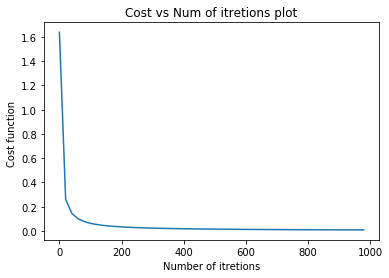

In [68]:
plt.plot(ind,cos)
plt.xlabel('Number of itretions')
plt.ylabel('Cost function ')
plt.title('Cost vs Num of itretions plot' )

In [70]:
print(dw)
print(db)

[[-0.00243314]
 [ 0.00527975]]
-0.000911587134268


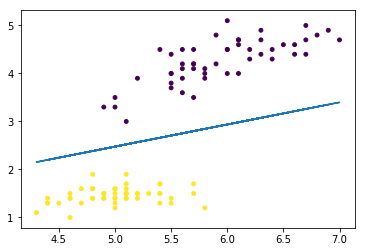

In [78]:
# Decsion boundery
plt.scatter(df['Sepal.Length'],df['Petal.Length'],c= df['flag'],s = 15)
plt.plot(df['Sepal.Length'],-((dw[0,0]*df['Sepal.Length'])+db)/dw[1,0])
